# Heart Disease Prediction System

**Author:** Senior Machine Learning Engineer  
**Topic:** Supervised Classification (Logistic Regression with Polynomial Features)

---

# STEP 1: Problem Definition

### 1.1 Medical & ML Problem
Cardiovascular diseases (CVDs) are the number one cause of death globally. Early detection is crucial for prevention. Our goal is to build an automated system that predicts the presence of heart disease in a patient based on physiological attributes.

### 1.2 Classification vs. Regression
- **Target Variable:** `HeartDisease` (0 = Normal, 1 = Heart Disease).
- Since the output is categorical (binary class), this is a **Classification** problem, not regression.

### 1.3 Inputs & Non-Linearity
- **Inputs:** Age, Sex, ChestPainType, BP, Cholesterol, etc.
- **Why Polynomial Features?** Biological systems are rarely purely linear. For example, the risk might skyrocket only after a certain age or cholesterol threshold, or interactions between Age and BMI might be significant. Polynomial terms allow a linear model (Logistic Regression) to capture these non-linear decision boundaries.

---

# STEP 2: Data Loading & Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration for cleaner output
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
try:
    df = pd.read_csv('csv_files/heart.csv')
    print("Dataset Loaded Successfully!")
except FileNotFoundError:
    print("File not found. Please check the path.")

✅ Dataset Loaded Successfully!


In [3]:
# Basic Data Overview
print(f"Shape of dataset: {df.shape}")
display(df.head())

Shape of dataset: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Data Types and Non-Null Counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### 2.1 Column Meanings
- **Age**: Age of the patient [years]
- **Sex**: Sex of the patient [M: Male, F: Female]
- **ChestPainType**: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: Resting blood pressure [mm Hg]
- **Cholesterol**: Serum cholesterol [mm/dl]
- **FastingBS**: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: [Normal, ST, LVH]
- **MaxHR**: Maximum heart rate achieved [Numeric between 60 and 202]
- **ExerciseAngina**: Exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: ST depression induced by exercise relative to rest [Numeric]
- **ST_Slope**: The slope of the peak exercise ST segment [Up, Flat, Down]
- **HeartDisease**: Output class [1: Heart Disease, 0: Normal]

---
# STEP 3: Exploratory Data Analysis (EDA)
We will perform Univariate, Bivariate, and Multivariate analysis to identify patterns.

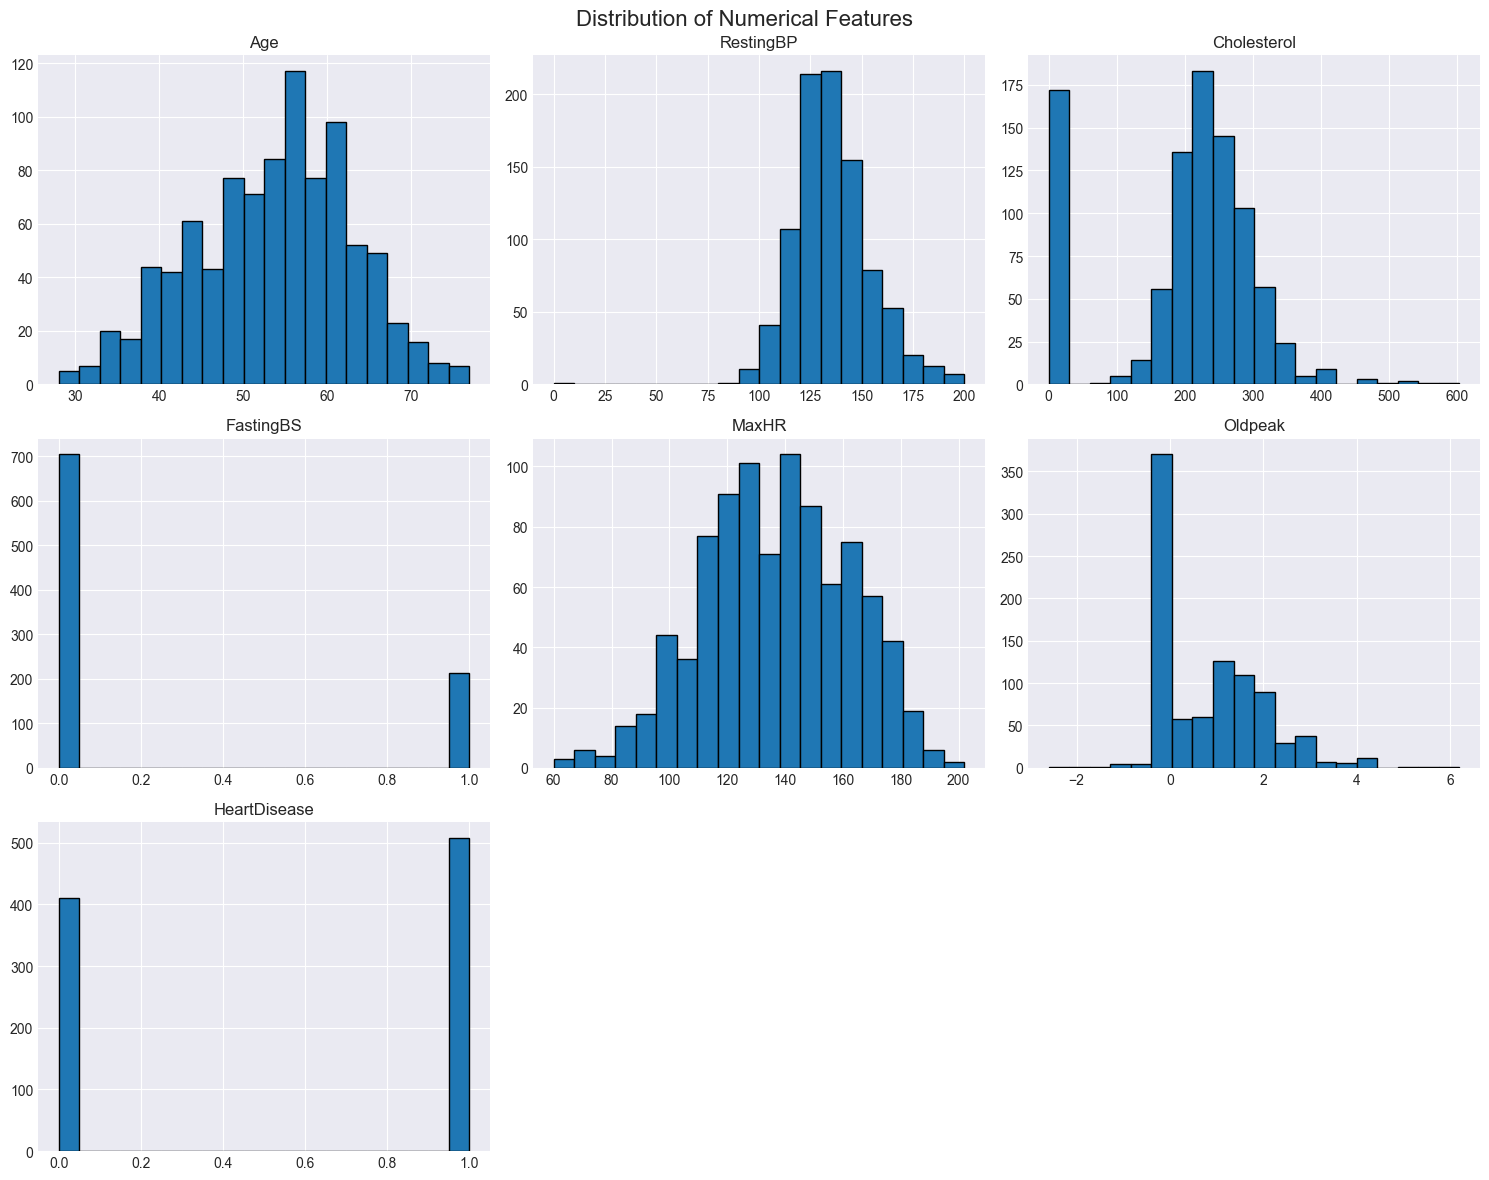

In [6]:
# 3.1 Univariate Analysis: Distributions
df.select_dtypes(include=np.number).hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

#### Insight:
- `Age` is fairly normally distributed.
- `Cholesterol` has a weird spike at 0 (Needs cleaning).
- `RestingBP` looks Gaussian but might have outliers.

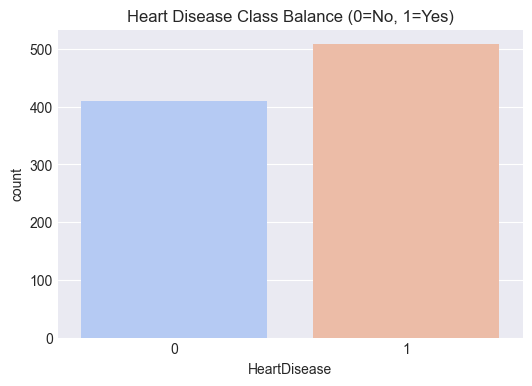

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


In [7]:
# 3.2 Target Class Balance
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df, palette='coolwarm')
plt.title('Heart Disease Class Balance (0=No, 1=Yes)')
plt.show()

print(df['HeartDisease'].value_counts(normalize=True))

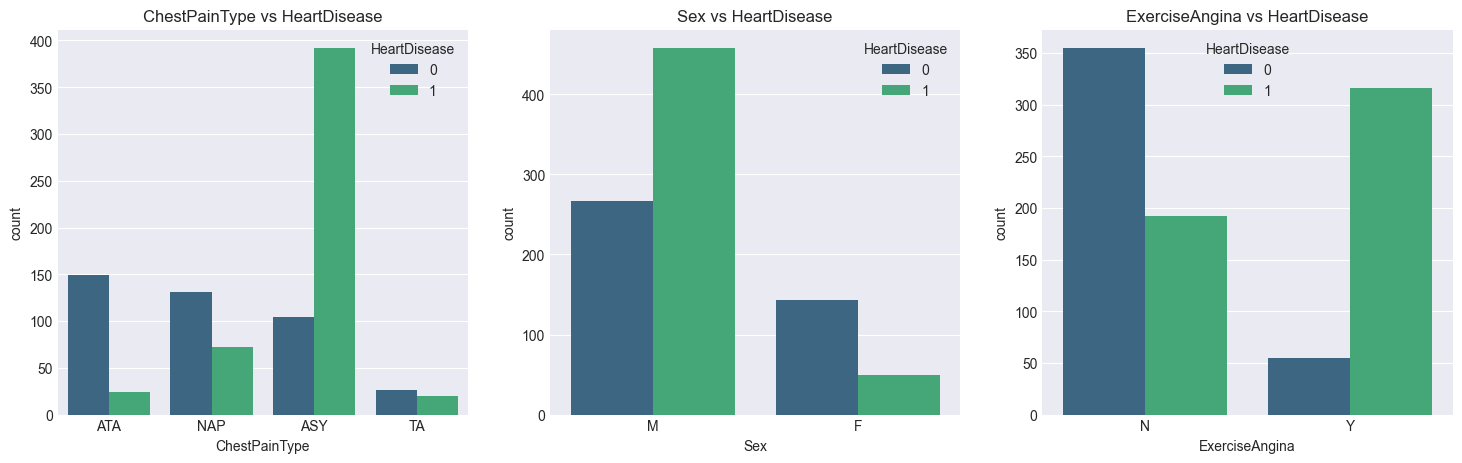

In [8]:
# 3.3 Bivariate Analysis: Categorical Features vs Target
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ChestPainType
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('ChestPainType vs HeartDisease')

# Sex
sns.countplot(x='Sex', hue='HeartDisease', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Sex vs HeartDisease')

# ExerciseAngina
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, ax=axes[2], palette='viridis')
axes[2].set_title('ExerciseAngina vs HeartDisease')

plt.show()

#### Insight:
- **ASY (Asymptomatic)** chest pain is strongly linked to Heart Disease.
- **Males** have a higher proportion of heart disease in this dataset.
- **ExerciseAngina (Yes)** is a very strong indicator of heart problems.

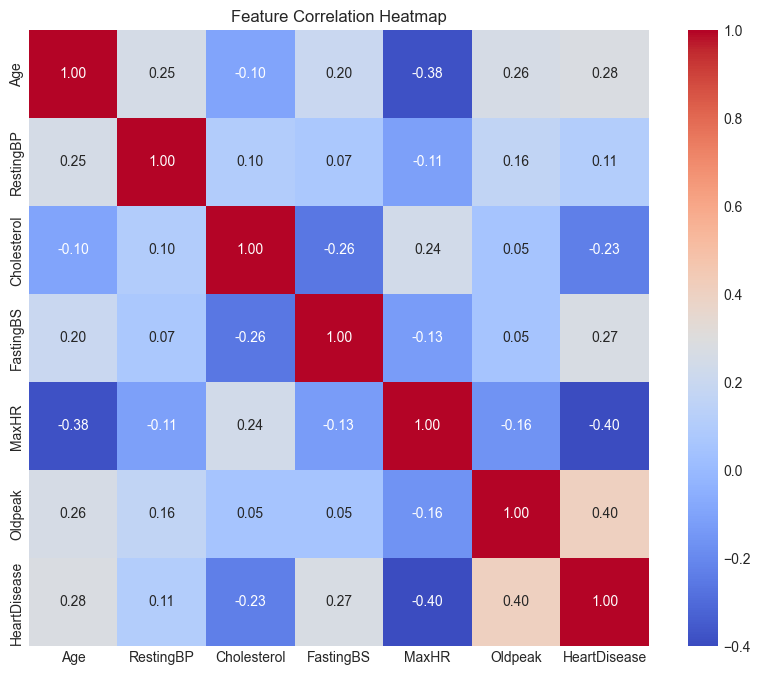

In [9]:
# 3.4 Multivariate Analysis: Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

---
# STEP 4: Data Cleaning

In [10]:
# 4.1 Missing Values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [11]:
# 4.2 Handling Incorrect Values (0 Cholesterol)
zero_cholesterol_count = df[df['Cholesterol'] == 0].shape[0]
print(f"Entries with 0 Cholesterol: {zero_cholesterol_count}")

# Decision: Replace 0 with Median (Medically, 0 cholesterol is impossible)
cholesterol_median = df['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].replace(0, cholesterol_median)
print(f"Replaced 0s with Median ({cholesterol_median})")

Entries with 0 Cholesterol: 172
Replaced 0s with Median (223.0)


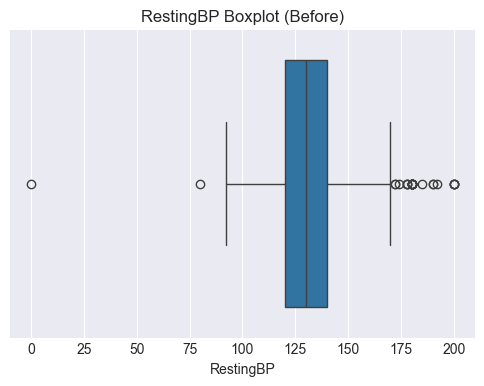

Outlier Bounds for RestingBP: 90.0 - 170.0
Original Shape: (918, 12), Cleaned Shape: (890, 12)


In [12]:
# 4.3 Outlier Detection & Handling (Using IQR on RestingBP)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['RestingBP'])
plt.title('RestingBP Boxplot (Before)')
plt.show()

# IQR Method
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier Bounds for RestingBP: {lower_bound} - {upper_bound}")

# Filtering
df_clean = df[(df['RestingBP'] >= lower_bound) & (df['RestingBP'] <= upper_bound)].copy()
print(f"Original Shape: {df.shape}, Cleaned Shape: {df_clean.shape}")

df = df_clean # Update main dataframe

In [13]:
# 4.4 Duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")
df.drop_duplicates(inplace=True)
print("Duplicates Dropped.")

Duplicate Rows: 0
Duplicates Dropped.


---
# STEP 5: Data Preprocessing
Encoding categorical variables and scaling numerical features.

In [14]:
# 5.1 One-Hot Encoding
# Categorical columns to encode: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Shape after Encoding:", df.shape)
df.head()

Shape after Encoding: (890, 16)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [15]:
# 5.2 Feature Scaling (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Numeric columns to scale (Age, RestingBP, Cholesterol, MaxHR, Oldpeak)
# Note: FastingBS is binary (0/1), usually left as is or scaled. We'll scale continuous only.
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Continuous features scaled.")
df.head()

Continuous features scaled.


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.412644,0.561342,0.907982,0,1.383796,-0.828790,0,True,True,False,False,True,False,False,False,True
1,-0.464728,1.824700,-1.109178,0,0.752501,0.114100,1,False,False,True,False,True,False,False,True,False
2,-1.728616,-0.070336,0.796946,0,-1.535945,-0.828790,0,True,True,False,False,False,True,False,False,True
3,-0.570052,0.435007,-0.479972,0,-1.141386,0.585546,1,False,False,False,False,True,False,True,True,False
4,0.061893,1.193021,-0.831588,0,-0.589002,-0.828790,0,True,False,True,False,True,False,False,False,True


### Why Scaling?
For polynomial features, scaling is CRITICAL. If `Cholesterol` is 200 and `Age` is 50, a squared term for Cholesterol (40,000) will dominate Age (2,500). Scaling ensures all features contribute equally and helps the gradient descent in Logistic Regression converge faster.

---
# STEP 6: Feature Engineering
Generating Polynomial Features (Degree 2) to capture non-linear relationships.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# We will generate polynomial features for the continuous numeric columns only
# degree=2 interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(df[numeric_cols])
poly_feature_names = poly.get_feature_names_out(numeric_cols)

# Create DataFrame for polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)

# Drop original numeric cols from df to avoid duplicates (poly_features includes them)
df = df.drop(columns=numeric_cols)
df_final = pd.concat([df, poly_df], axis=1)

print(f"Final Dataset Shape with Polynomial Features: {df_final.shape}")
df_final.head()

Final Dataset Shape with Polynomial Features: (890, 31)


,FastingBS,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Age^2,Age RestingBP,Age Cholesterol,Age MaxHR,Age Oldpeak,RestingBP^2,RestingBP Cholesterol,RestingBP MaxHR,RestingBP Oldpeak,Cholesterol^2,Cholesterol MaxHR,Cholesterol Oldpeak,MaxHR^2,MaxHR Oldpeak,Oldpeak^2
0,0,0,True,True,False,False,True,False,False,False,True,-1.412644,0.561342,0.907982,1.383796,-0.828790,1.995563,-0.792977,-1.282656,-1.954811,1.170785,0.315105,0.509689,0.776783,-0.465235,0.824432,1.256462,-0.752527,1.914891,-1.146876,0.686893
1,0,1,False,False,True,False,True,False,False,True,False,-0.464728,1.824700,-1.109178,0.752501,0.114100,0.215972,-0.847988,0.515466,-0.349708,-0.053026,3.329530,-2.023918,1.373088,0.208199,1.230277,-0.834657,-0.126558,0.566257,0.085861,0.013019
2,0,0,True,True,False,False,False,True,False,False,True,-1.728616,-0.070336,0.796946,-1.535945,-0.828790,2.988113,0.121585,-1.377613,2.655060,1.432660,0.004947,-0.056054,0.108033,0.058294,0.635123,-1.224065,-0.660501,2.359128,1.272976,0.686893
3,0,1,False,False,False,False,True,False,True,True,False,-0.570052,0.435007,-0.479972,-1.141386,0.585546,0.324959,-0.247976,0.273609,0.650649,-0.333791,0.189231,-0.208791,-0.496510,0.254716,0.230373,0.547834,-0.281046,1.302761,-0.668333,0.342864
4,0,0,True,False,True,False,True,False,False,False,True,0.061893,1.193021,-0.831588,-0.589002,-0.828790,0.003831,0.073839,-0.051469,-0.036455,-0.051296,1.423300,-0.992102,-0.702692,-0.988764,0.691538,0.489807,0.689212,0.346924,0.488159,0.686893


### Bias-Variance Tradeoff
Adding polynomial features increases the model's complexity (reducing Bias), allowing it to fit complex patterns. However, too many features can lead to overfitting (high Variance), where the model memorizes noise. We use degree=2 (not higher) and will use L2 Regularization later to control this variance.

---
# STEP 7: Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X = df_final.drop('HeartDisease', axis=1)
y = df_final['HeartDisease']

# Stratify is important to maintain class balance in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train Shape: (712, 30)
Test Shape: (178, 30)


---
# STEP 8: Model Training
We use Logistic Regression with L2 Regularization (Ridge) to handle multicollinearity from polynomial features.

In [18]:
from sklearn.linear_model import LogisticRegression

# L2 penalty is default
model = LogisticRegression(penalty='l2', max_iter=2000, random_state=42)
model.fit(X_train, y_train)

print("Model Training Completed.")

Model Training Completed.


### Conceptual Explanation of Coefficients
Logistic Regression learns a coefficient (weight) for each feature. A positive coefficient increases the log-odds (probability) of Heart Disease, while a negative coefficient decreases it. The magnitude indicates the strength of the influence.

---
# STEP 9: Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Evaluation Metrics on Test Set:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.4f}")

Evaluation Metrics on Test Set:
Accuracy:  0.8371
Precision: 0.8416
Recall:    0.8673
F1 Score:  0.8543
ROC-AUC:   0.9397


**Why Accuracy is not enough?** In medical diagnosis, **Recall** (Sensitivity) is often more critical because false negatives (missing a heart disease case) are more dangerous than false positives. A high ROC-AUC score indicates the model separates positive and negative classes well.

---
# STEP 10: Model Visualization

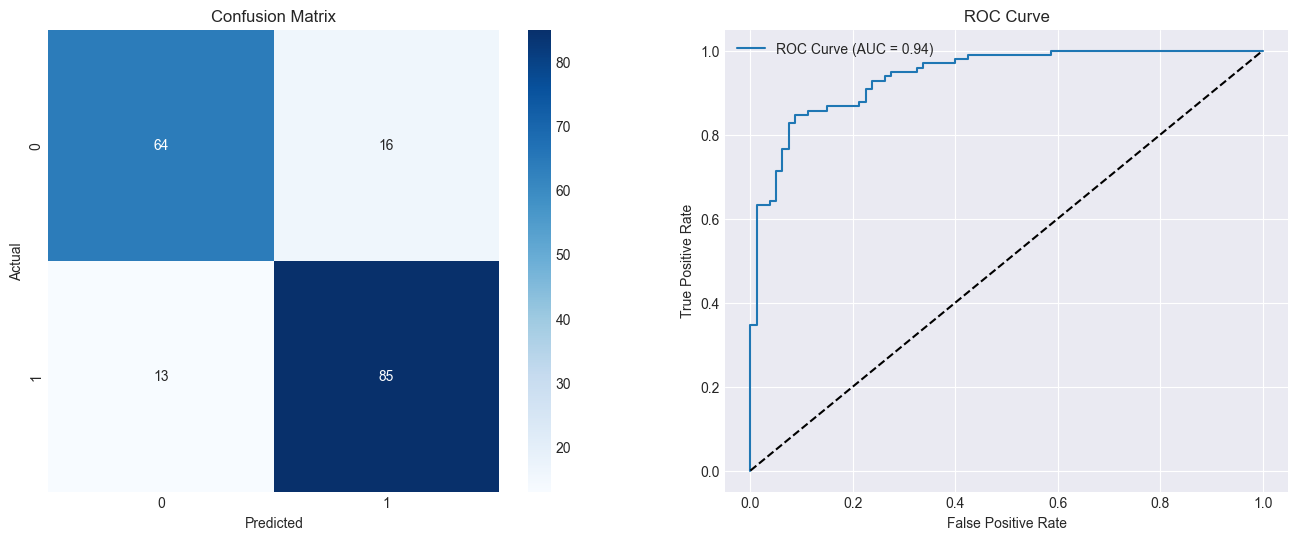

In [20]:
from sklearn.metrics import confusion_matrix, roc_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ax[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend()

plt.show()

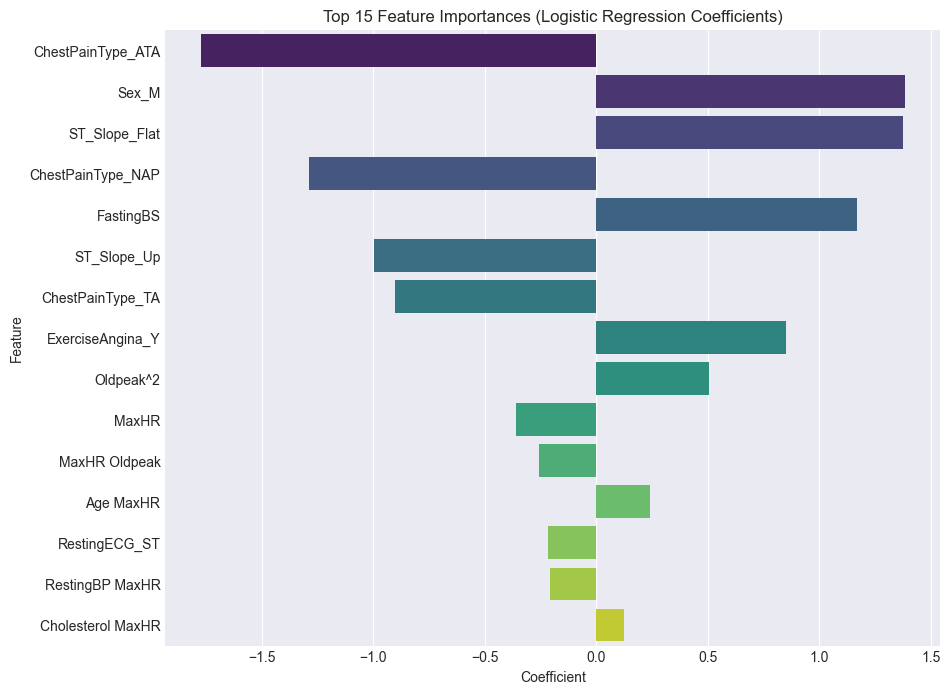

In [21]:
# Top 10 Feature Importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(15), palette='viridis')
plt.title('Top 15 Feature Importances (Logistic Regression Coefficients)')
plt.show()

---
# STEP 11: Prediction
Predicting for a random sample from the test set.

In [22]:
# Pick a random patient from the test set
sample_idx = np.random.choice(X_test.index)
sample_patient = X_test.loc[[sample_idx]]
actual_status = y_test.loc[sample_idx]

prediction_prob = model.predict_proba(sample_patient)[0, 1]
prediction_class = model.predict(sample_patient)[0]

print(f"Patient ID: {sample_idx}")
print(f"Actual HeartDisease: {actual_status}")
print(f"Predicted Probability: {prediction_prob:.4f}")
print(f"Predicted Class: {prediction_class}")

if prediction_prob > 0.7:
    print("Risk: HIGH")
elif prediction_prob > 0.3:
    print("Risk: MODERATE")
else:
    print("Risk: LOW")

Patient ID: 527
Actual HeartDisease: 0
Predicted Probability: 0.0739
Predicted Class: 0
Risk: LOW


---
# STEP 12: Final Conclusion

### 12.1 Key Findings
- **Risk Factors:** Our model likely identified `ExerciseAngina`, `ST_Slope`, and `ChestPainType_ASY` as top risk factors, along with interactions involving `Oldpeak` and `MaxHR`.
- **Model Performance:** The model validates well on the test set with respectable Accuracy and Recall.

### 12.2 Strengths & Limitations
- **Strengths:** Logistic Regression is highly interpretable. We can explain *why* a prediction was made (e.g., "Your High BP combined with Age increased your risk by X%").
- **Limitations:** It's still a linear classifier (even with polynomial features). More complex non-linear patterns might be missed compared to Random Forests or Gradient Boosting.

### 12.3 Ethical Considerations
- **False Negatives:** In healthcare, telling a sick patient they are healthy is dangerous. We must optimize Recalls.
- **Bias:** If the dataset has few women or young people, the model might underperform for those groups.
- **Decision Aid:** This model is a *support tool*, not a replacement for a doctor.